<a href="https://colab.research.google.com/github/Barnettxxf/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter07/Understanding_selectivesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install selectivesearch
%pip install torch_snippets
from torch_snippets import *
import selectivesearch
from skimage.segmentation import felzenszwalb

  Preparing metadata (setup.py) ... done
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4336 sha256=920ae09e0658a2b335f93725ba4355e014b19d4b659f89c3e0e754a86c555ae5
  Stored in directory: /root/.cache/pip/wheels/7f/9b/c7/58b71f1e9fe4aa0ef8affd1c673f8818bc22a5091ea8cbbe93
Successfully built selectivesearch


In [ ]:
!wget -q "https://cdn.psychologytoday.com/sites/default/files/styles/image-article_inline_full_caption/public/field_blog_entry_images/man-692753_1280.jpg" -O MyImage.jpg
img = read('MyImage.jpg', 1)

In [ ]:
segments_fz = felzenszwalb(img, scale=200)

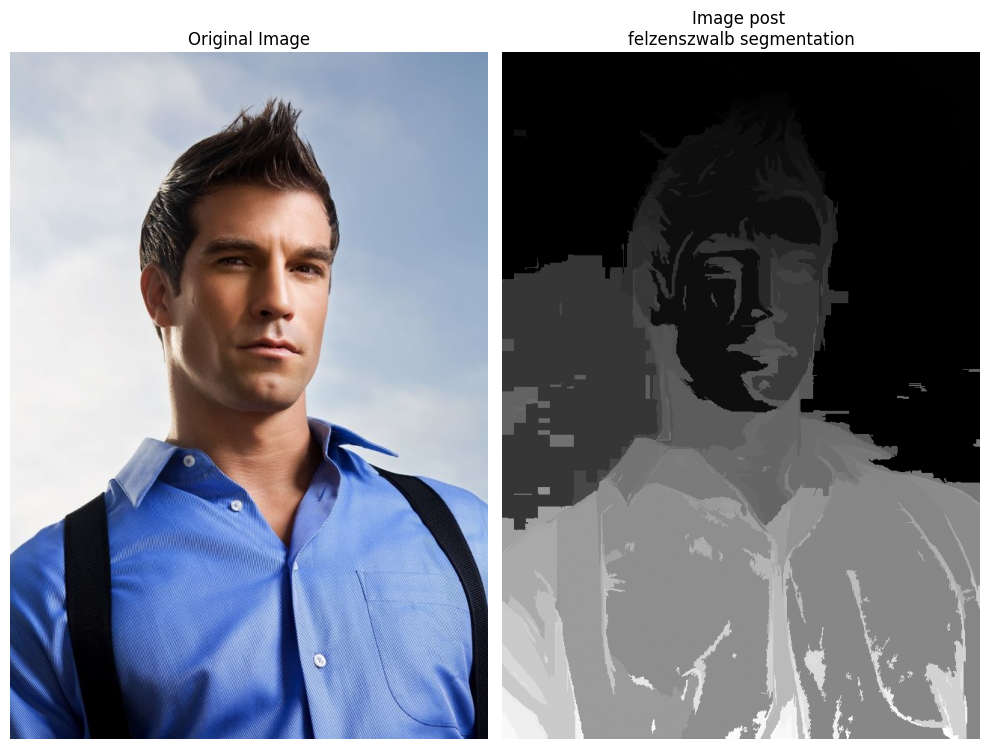

In [6]:
subplots([img, segments_fz], titles=['Original Image','Image post \nfelzenszwalb segmentation'], figsize=(10,10), nc=2)

In [7]:
def extract_candidates(img):
    img_lbl, regions = selectivesearch.selective_search(img, scale=200, min_size=100)
    img_area = np.prod(img.shape[:2])
    candidates = []
    for r in regions:
        if r['rect'] in candidates: continue
        if r['size'] < (0.05*img_area): continue
        if r['size'] > (1*img_area): continue
        x, y, w, h = r['rect']
        candidates.append(list(r['rect']))
    return candidates


In [8]:
%pip install selectivesearch
%pip install torch_snippets
from torch_snippets import *
import selectivesearch
# !wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
# img = read('Hemanvi.jpeg', 1)

/usr/local/lib/python3.12/dist-packages/skimage/feature/texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


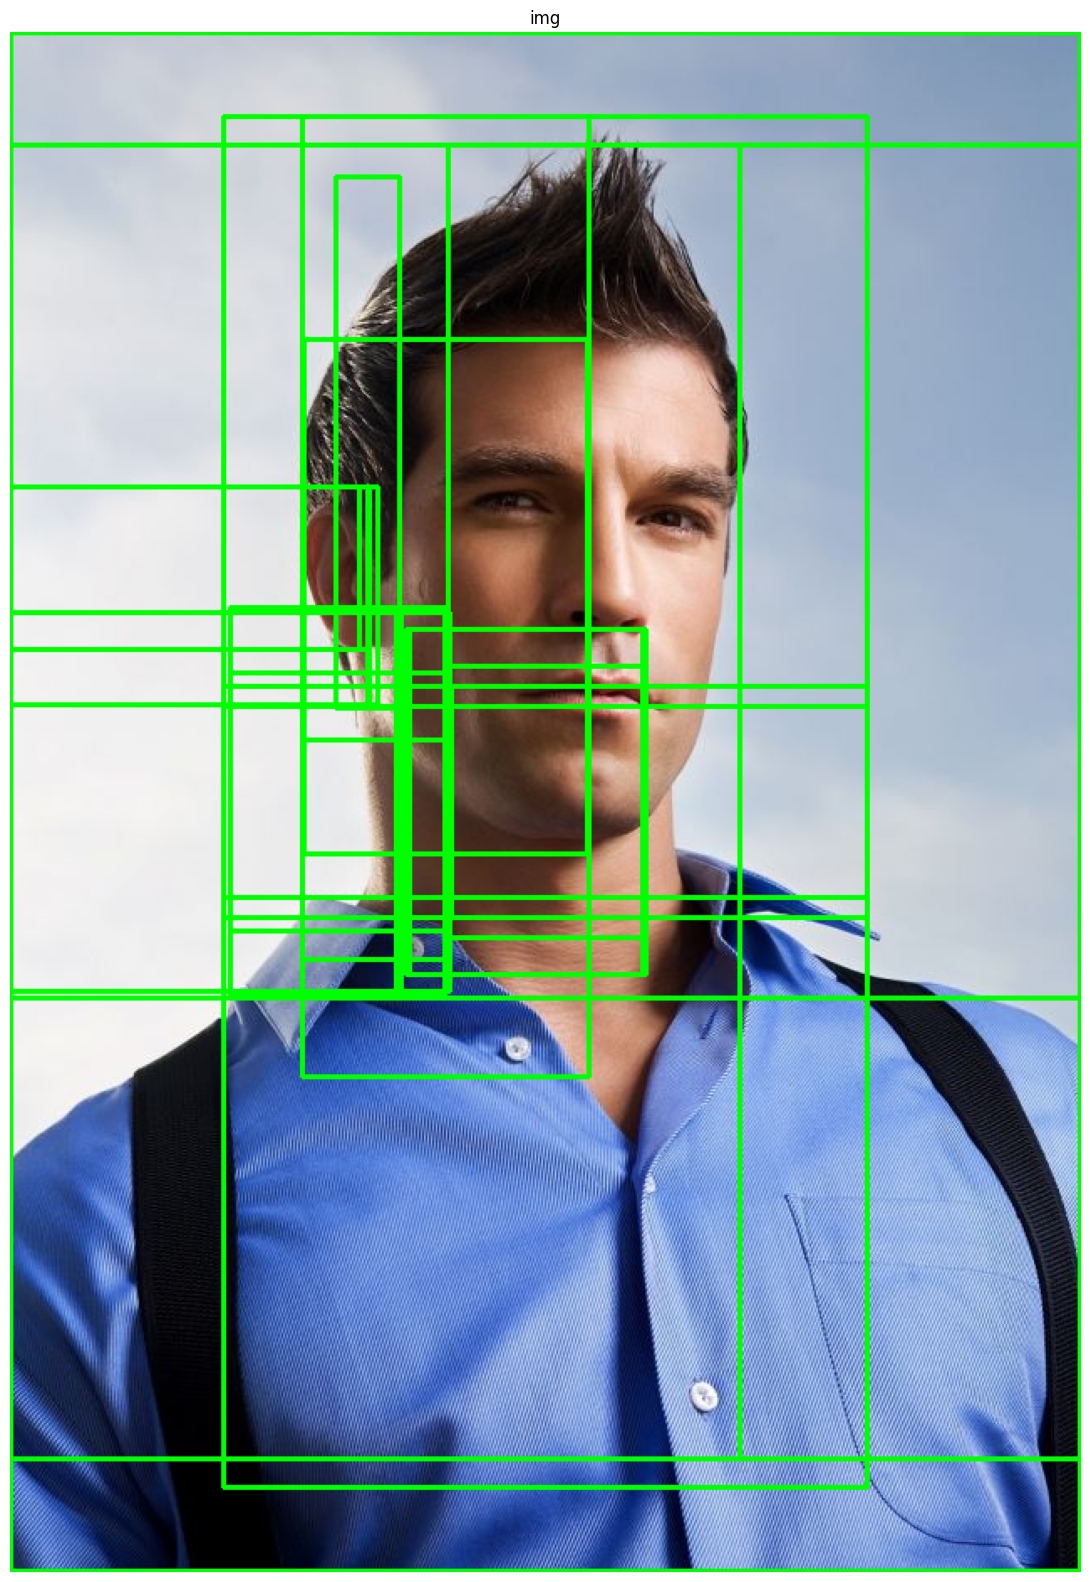

In [9]:
candidates = extract_candidates(img)
show(img, bbs = candidates)